In [110]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
companyData = pd.read_csv('datasets/company_data.csv')

In [119]:
interested_company = companyData.head(40)

In [123]:
tickers = list(interested_company['ticker'].unique())

In [147]:
overall_info = {}
for ticker in tickers:
    data = yf.Ticker(ticker)
    info = data.info

    overall_info[ticker] = {
        'Current Price': info.get('currentPrice', np.nan),
        'Outstanding Shares': info.get('sharesOutstanding', np.nan),
        'Market Capitalization': info.get('marketCap', np.nan),
        'P/E Ratio forward': info.get('forwardPE', np.nan),
        # Measures a company's current share price relative to its earnings per share (EPS)
        'P/E Ratio trailing': info.get('trailingPE', np.nan),
        
        'P/B Ratio': info.get('priceToBook', np.nan),
        # The P/B ratio compares a company’s market capitalization to its book value, which is the value of its total assets minus its total liabilities. 
        'Dividend Rate': info.get('dividendRate', np.nan),

        'Beta': info.get('beta', np.nan),
        # Measures a stock's volatility relative to the market. A beta greater than 1 indicates higher risk and potential for higher returns.
        'Revenue': info.get('totalRevenue', np.nan),
        'Profit Margin': info.get('profitMargins', np.nan),

        'ROE': info.get('returnOnEquity', np.nan),
        # Measures the profitability of a company in relation to shareholders' equity. 
        'ROA': info.get('returnOnAssets', np.nan),
        # Indicates how effectively a company is using its assets to generate earnings. 
        'Debt-to-Equity Ratio': info.get('debtToEquity', np.nan),
        # Compares a company's total liabilities to its shareholders' equity. 

        'Current Ratio': info.get('currentRatio', np.nan),
        # Measures a company's ability to pay short-term obligations with its current assets. 
        'Quick Ratio': info.get('quickRatio', np.nan),
        # A more stringent measure of liquidity than the current ratio, excluding inventory from current assets. 
        # Calculated as (current assets - inventory) / current liabilities.

        'Gross Margin': info.get('grossMargins', np.nan),
        # Indicates the percentage of revenue that exceeds the cost of goods sold (COGS).
        'Operating Margin': info.get('operatingMargins', np.nan),
        # Measures the percentage of revenue left after covering operating expenses. It reflects operational efficiency.
        'Net Profit Margin': info.get('profitMargins', np.nan),
        # Indicates the percentage of revenue that remains as profit after all expenses, taxes, and costs have been deducted.
        'Free Cash Flow': info.get('freeCashflow', np.nan),
        # Represents the cash generated by a company after accounting for capital expenditures. It’s a measure of financial health and liquidity.
        'Enterprise Value': info.get('enterpriseValue', np.nan),
        # Represents the total value of a company, including equity and debt, minus cash and cash equivalents. 
        'EBIT': info.get('ebit', np.nan),
        
        'EBITDA': info.get('ebitda', np.nan),
        
        'PEG Ratio': info.get('pegRatio', np.nan)
    }

In [148]:
overall_df = pd.DataFrame(overall_info).T
overall_df.head()

,Current Price,Outstanding Shares,Market Capitalization,P/E Ratio,Dividend Rate,Beta,Revenue,Profit Margin,ROE,ROA,...,Gross Margin,Operating Margin,Net Profit Margin,Free Cash Flow,Enterprise Value,EBIT,EBITDA,Asset Turnover Ratio,Inventory Turnover Ratio,PEG Ratio
AAPL,222.9100,1.511580e+10,3.369463e+12,26.727818,1.00,1.239,3.910350e+11,0.23971,1.57413,0.21464,...,0.46206,0.31171,0.23971,1.124780e+11,3.411141e+12,NaN,1.346610e+11,NaN,NaN,2.86
NVDA,135.3699,2.453000e+10,3.320624e+12,33.342342,0.04,1.669,9.630700e+10,0.55041,1.23767,0.55258,...,0.75976,0.62057,0.55041,3.372587e+10,3.296577e+12,NaN,6.118400e+10,NaN,NaN,0.81
MSFT,410.3700,7.434880e+09,3.051052e+12,27.285238,3.32,0.896,2.541900e+11,0.35608,0.35604,0.14592,...,0.69349,0.46584,0.35608,6.128087e+10,3.069461e+12,NaN,1.365520e+11,NaN,NaN,2.18
GOOGL,171.2900,5.843000e+09,2.104280e+12,19.181410,0.80,1.038,3.398590e+11,0.27738,0.32101,0.16483,...,0.58127,0.32312,0.27738,4.110450e+10,2.032820e+12,NaN,1.234700e+11,NaN,NaN,0.98
AMZN,197.9300,1.051500e+10,2.081234e+12,34.303290,NaN,1.147,6.201280e+11,0.08042,0.22558,0.07069,...,0.48406,0.10959,0.08042,5.432825e+10,2.151720e+12,NaN,1.115830e+11,NaN,NaN,1.28


In [151]:
overall_df['Divident Yield'] = overall_df['Dividend Rate']/overall_df['Current Price']

In [ ]:
# indexer S&P 500

In [152]:
stock_data = yf.download(tickers, start='2014-01-01', end='2024-11-01')

[*********************100%***********************]  40 of 40 completed


In [153]:
stock_data.head()

Price                      Adj Close                                         \
Ticker                          AAPL       ABBV        ACN   AMD       AMZN   
Date                                                                          
2014-01-02 00:00:00+00:00  17.253262  33.291306  67.049667  3.95  19.898500   
2014-01-03 00:00:00+00:00  16.874279  33.496250  67.272804  4.00  19.822001   
2014-01-06 00:00:00+00:00  16.966293  32.272968  66.562042  4.13  19.681499   
2014-01-07 00:00:00+00:00  16.844954  32.337006  67.371979  4.18  19.901501   
2014-01-08 00:00:00+00:00  16.951635  32.253746  67.892647  4.18  20.096001   

Price                                                                      \
Ticker                          ASML      AVGO        AZN BABA        BAC   
Date                                                                        
2014-01-02 00:00:00+00:00  82.818993  3.961284  20.251814  NaN  13.049142   
2014-01-03 00:00:00+00:00  82.532059  3.976331  20.352089  NaN  13.300396   
2014-01-06 00:00:00+00:00  80.837288  3.949248  20.362457  NaN  13.503023   
2014-01-07 00:00:00+00:00  80.155785  3.986866  20.231066  NaN  13.373343   
2014-01-08 00:00:00+00:00  80.370995  4.046302  20.234528  NaN  13.438185   

Price                      ...    Volume                                    \
Ticker                     ...        PG RCIT      SAP        SPY     TMUS   
Date                       ...                                               
2014-01-02 00:00:00+00:00  ...   6981700    0  1541300  119636900  6512500   
2014-01-03 00:00:00+00:00  ...   6925600    0  1265600   81390600  8686100   
2014-01-06 00:00:00+00:00  ...   7208200    0   517500  108028200  9332400   
2014-01-07 00:00:00+00:00  ...   7158200    0   710500   86144200  7008000   
2014-01-08 00:00:00+00:00  ...  13458800    0  1124500   96582300  5313600   

Price                                                                       
Ticker                         TSLA      UNH         V       WMT       XOM  
Date                                                                        
2014-01-02 00:00:00+00:00  92826000  3067000  10654000  20634000  11028100  
2014-01-03 00:00:00+00:00  70425000  3206400   7809600  14872200   9295600  
2014-01-06 00:00:00+00:00  80416500  3424500   8577600  21840600  11848500  
2014-01-07 00:00:00+00:00  75511500  6542500   8178000  15036900  11187000  
2014-01-08 00:00:00+00:00  92448000  6172200   8487200  17865600  11180400  

[5 rows x 240 columns]

In [157]:
close_data = stock_data['Adj Close']

In [182]:
close_data.head()

Ticker,AAPL,ABBV,ACN,AMD,AMZN,ASML,AVGO,AZN,BABA,BAC,...,PG,RCIT,SAP,SPY,TMUS,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00+00:00,17.253262,33.291306,67.049667,3.95,19.898500,82.818993,3.961284,20.251814,NaN,13.049142,...,58.940632,962.520020,70.858490,151.242935,32.860001,10.006667,63.254967,51.229271,21.054291,63.254974
2014-01-03 00:00:00+00:00,16.874279,33.496250,67.272804,4.00,19.822001,82.532059,3.976331,20.352089,NaN,13.300396,...,58.874752,969.109985,70.374474,151.218155,31.786661,9.970667,63.704533,51.264050,20.984919,63.102787
2014-01-06 00:00:00+00:00,16.966293,32.272968,66.562042,4.13,19.681499,80.837288,3.949248,20.362457,NaN,13.503023,...,59.013809,972.469971,70.449585,150.779922,32.968323,9.800000,62.975056,50.955757,20.867519,63.197918
2014-01-07 00:00:00+00:00,16.844954,32.337006,67.371979,4.18,19.901501,80.155785,3.986866,20.231066,NaN,13.373343,...,59.584652,976.219971,70.249290,151.705963,32.712299,9.957333,64.900604,51.345169,20.931564,64.092041
2014-01-08 00:00:00+00:00,16.951635,32.253746,67.892647,4.18,20.096001,80.370995,4.046302,20.234528,NaN,13.438185,...,58.721111,973.229980,71.309120,151.739029,32.800919,10.085333,64.145638,51.509739,20.766130,63.882755


In [188]:
close_data_20_day_SMA = close_data.rolling(window=20).mean()
close_data_20_day_EMA = close_data.ewm(span=20, adjust=False).mean()


KeyError: 'Daily return'

In [187]:
close_data_20_day_SMA

Ticker,AAPL,ABBV,ACN,AMD,AMZN,ASML,AVGO,AZN,BABA,BAC,...,PG,RCIT,SAP,SPY,TMUS,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,230.0605,191.499216,363.934276,161.4525,186.259001,777.753854,177.092500,77.511501,106.172999,41.1100,...,169.822278,2270.936499,228.494501,577.120999,215.671999,236.207502,579.817999,280.709001,80.987500,121.3955
2024-10-28 00:00:00+00:00,230.0805,191.187440,364.397925,161.2445,186.362001,771.538403,177.068501,77.416500,105.863499,41.2570,...,169.677897,2269.060999,229.053501,577.474500,216.744499,236.251502,578.845999,281.171001,81.087500,121.4795
2024-10-29 00:00:00+00:00,230.4535,190.889959,365.022269,161.5695,186.647001,766.273932,177.657001,77.244001,105.217999,41.4225,...,169.434969,2267.160999,229.878501,578.132001,217.741999,236.326502,577.787500,281.385001,81.109000,121.3470


In [158]:
close_data.head()

Ticker,AAPL,ABBV,ACN,AMD,AMZN,ASML,AVGO,AZN,BABA,BAC,...,PG,RCIT,SAP,SPY,TMUS,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00+00:00,17.253262,33.291306,67.049667,3.95,19.898500,82.818993,3.961284,20.251814,NaN,13.049142,...,58.940632,962.520020,70.858490,151.242935,32.860001,10.006667,63.254967,51.229271,21.054291,63.254974
2014-01-03 00:00:00+00:00,16.874279,33.496250,67.272804,4.00,19.822001,82.532059,3.976331,20.352089,NaN,13.300396,...,58.874752,969.109985,70.374474,151.218155,31.786661,9.970667,63.704533,51.264050,20.984919,63.102787
2014-01-06 00:00:00+00:00,16.966293,32.272968,66.562042,4.13,19.681499,80.837288,3.949248,20.362457,NaN,13.503023,...,59.013809,972.469971,70.449585,150.779922,32.968323,9.800000,62.975056,50.955757,20.867519,63.197918
2014-01-07 00:00:00+00:00,16.844954,32.337006,67.371979,4.18,19.901501,80.155785,3.986866,20.231066,NaN,13.373343,...,59.584652,976.219971,70.249290,151.705963,32.712299,9.957333,64.900604,51.345169,20.931564,64.092041
2014-01-08 00:00:00+00:00,16.951635,32.253746,67.892647,4.18,20.096001,80.370995,4.046302,20.234528,NaN,13.438185,...,58.721111,973.229980,71.309120,151.739029,32.800919,10.085333,64.145638,51.509739,20.766130,63.882755


In [160]:
daily_returns = close_data.pct_change()

In [161]:
daily_returns.head()

Ticker,AAPL,ABBV,ACN,AMD,AMZN,ASML,AVGO,AZN,BABA,BAC,...,PG,RCIT,SAP,SPY,TMUS,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,-0.021966,0.006156,0.003328,0.012658,-0.003845,-0.003465,0.003798,0.004951,NaN,0.019254,...,-0.001118,0.006847,-0.006831,-0.000164,-0.032664,-0.003598,0.007107,0.000679,-0.003295,-0.002406
2014-01-06 00:00:00+00:00,0.005453,-0.036520,-0.010565,0.032500,-0.007088,-0.020535,-0.006811,0.000509,NaN,0.015235,...,0.002362,0.003467,0.001067,-0.002898,0.037175,-0.017117,-0.011451,-0.006014,-0.005594,0.001508
2014-01-07 00:00:00+00:00,-0.007152,0.001984,0.012168,0.012106,0.011178,-0.008431,0.009525,-0.006453,NaN,-0.009604,...,0.009673,0.003856,-0.002843,0.006142,-0.007766,0.016054,0.030576,0.007642,0.003069,0.014148
2014-01-08 00:00:00+00:00,0.006333,-0.002575,0.007728,0.000000,0.009773,0.002685,0.014908,0.000171,NaN,0.004849,...,-0.014493,-0.003063,0.015087,0.000218,0.002709,0.012855,-0.011633,0.003205,-0.007904,-0.003265


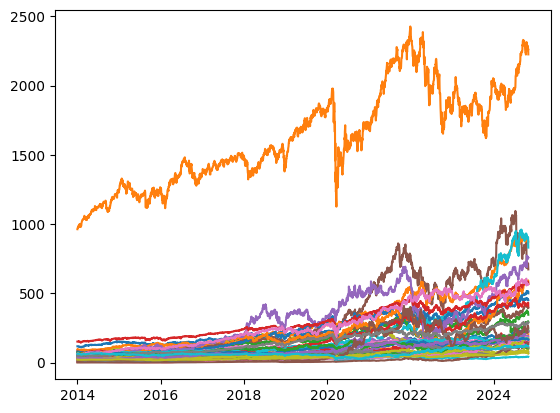

In [163]:
plt.plot(close_data)

In [164]:
annual_volatility = daily_returns.std() * np.sqrt(252)

In [165]:
annual_volatility

Ticker
AAPL     0.280510
ABBV     0.262786
ACN      0.241863
AMD      0.575308
AMZN     0.327424
ASML     0.359947
AVGO     0.359615
AZN      0.248032
BABA     0.415291
BAC      0.304123
BRK-B    0.188750
COST     0.210560
CRM      0.347680
CVX      0.288311
GOOGL    0.278040
HD       0.237804
JNJ      0.178086
JPM      0.265073
KO       0.175900
LLY      0.270021
MA       0.266155
META     0.374667
MRK      0.214014
MSFT     0.265975
NFLX     0.437251
NVDA     0.471159
NVO      0.269055
NVS      0.186009
ORCL     0.268472
PEP      0.181962
PG       0.179790
RCIT     0.199772
SAP      0.260180
SPY      0.171844
TMUS     0.266659
TSLA     0.560931
UNH      0.253367
V        0.242407
WMT      0.205606
XOM      0.270643
dtype: float64

In [166]:
annual_returns = daily_returns.mean() * 252
annual_returns

Ticker
AAPL     0.277227
ABBV     0.202357
ACN      0.180640
AMD      0.494767
AMZN     0.260361
ASML     0.258658
AVGO     0.412360
AZN      0.147027
BABA     0.092293
BAC      0.153830
BRK-B    0.142170
COST     0.227962
CRM      0.215165
CVX      0.100352
GOOGL    0.206654
HD       0.196708
JNJ      0.095248
JPM      0.186209
KO       0.090804
LLY      0.315022
MA       0.207072
META     0.287472
MRK      0.124632
MSFT     0.272970
NFLX     0.344785
NVDA     0.653174
NVO      0.222333
NVS      0.093917
ORCL     0.188974
PEP      0.110453
PG       0.111418
RCIT     0.097653
SAP      0.144593
SPY      0.137283
TMUS     0.212640
TSLA     0.454208
UNH      0.234552
V        0.189572
WMT      0.146782
XOM      0.093302
dtype: float64

In [167]:
# here, we would use five year treasury rate in US, which is 4.15%
risk_free_rate = 0.0415
sharpe_ratio = (annual_returns - risk_free_rate) / annual_volatility
sharpe_ratio

Ticker
AAPL     0.840350
ABBV     0.612121
ACN      0.575286
AMD      0.787868
AMZN     0.668432
ASML     0.603304
AVGO     1.031268
AZN      0.425457
BABA     0.122306
BAC      0.369358
BRK-B    0.533350
COST     0.885550
CRM      0.499497
CVX      0.204128
GOOGL    0.593993
HD       0.652672
JNJ      0.301810
JPM      0.545919
KO       0.280295
LLY      1.012964
MA       0.622088
META     0.656508
MRK      0.388443
MSFT     0.870268
NFLX     0.693616
NVDA     1.298232
NVO      0.672103
NVS      0.281798
ORCL     0.549310
PEP      0.378941
PG       0.388886
RCIT     0.281084
SAP      0.396239
SPY      0.557380
TMUS     0.641793
TSLA     0.735754
UNH      0.761943
V        0.610838
WMT      0.512054
XOM      0.191402
dtype: float64

/var/folders/yw/d34pj4ns3r75s0xjlqh337j00000gn/T/ipykernel_71047/1367646183.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(ticker, (annual_volatility[i], annual_returns[i]))


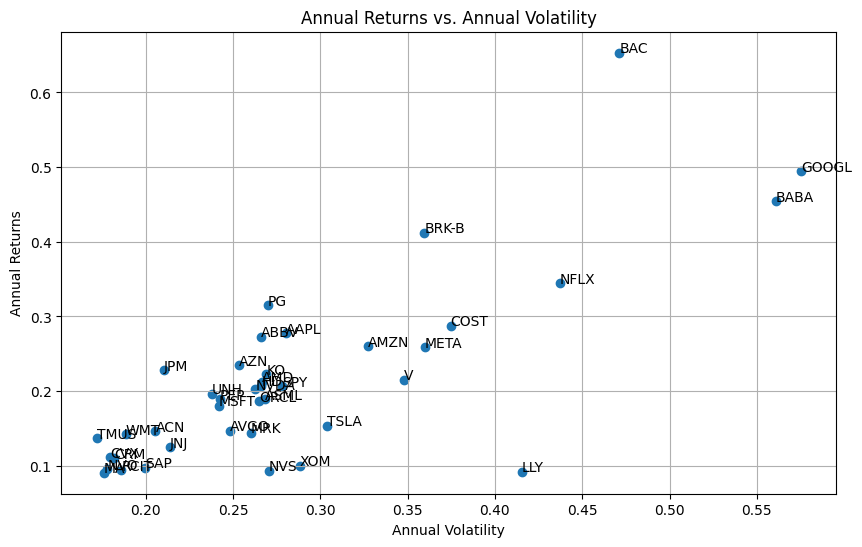

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(annual_volatility, annual_returns, marker='o')

for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (annual_volatility[i], annual_returns[i]))

plt.title('Annual Returns vs. Annual Volatility')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Returns')
plt.grid()
plt.show()

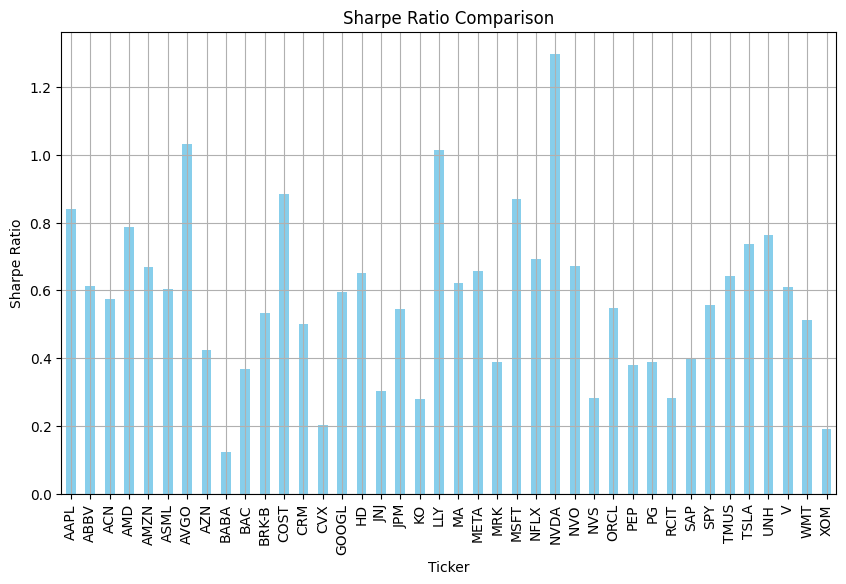

In [169]:
plt.figure(figsize=(10, 6))
sharpe_ratio.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratio Comparison')
plt.ylabel('Sharpe Ratio')
plt.grid()
plt.show()

In [170]:
bond_yield = yf.download('^TNX', start='2014-01-01', end='2024-11-01')['Adj Close']
# U.S. 10-Year Treasury yield (represented by ^TNX)
bond_yield = bond_yield.pct_change() 

[*********************100%***********************]  1 of 1 completed


In [176]:
bond_yield = bond_yield['^TNX']

In [180]:
correlation = daily_returns['AAPL'].corr(bond_yield)
print(correlation)

0.17192875037160638


In [22]:
stock_data.columns = stock_data.columns.droplevel(1)

In [23]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.874281,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.966297,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.844952,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.951628,19.409286,19.484285,19.238930,19.243214,258529600


In [24]:
stock_data['Daily return'] = stock_data['Adj Close'].pct_change()*100

In [25]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily return
Date,,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.754642,19.893929,19.715000,19.845715,234684800,NaN
2014-01-03 00:00:00+00:00,16.874281,19.320715,19.775000,19.301071,19.745001,392467600,-2.196552
2014-01-06 00:00:00+00:00,16.966297,19.426071,19.528570,19.057142,19.194643,412610800,0.545305
2014-01-07 00:00:00+00:00,16.844952,19.287144,19.498571,19.211430,19.440001,317209200,-0.715215
2014-01-08 00:00:00+00:00,16.951628,19.409286,19.484285,19.238930,19.243214,258529600,0.633282


In [26]:
# Calculate cumulative returns
stock_data['Cumulative Return'] = (stock_data['Adj Close'] / stock_data['Adj Close'].iloc[0] - 1) * 100
# here we are calculating the cumulative returns since January 2nd 2014


In [27]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily return,Cumulative Return
Date,,,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.754642,19.893929,19.715000,19.845715,234684800,NaN,0.000000
2014-01-03 00:00:00+00:00,16.874281,19.320715,19.775000,19.301071,19.745001,392467600,-2.196552,-2.196552
2014-01-06 00:00:00+00:00,16.966297,19.426071,19.528570,19.057142,19.194643,412610800,0.545305,-1.663226
2014-01-07 00:00:00+00:00,16.844952,19.287144,19.498571,19.211430,19.440001,317209200,-0.715215,-2.366545
2014-01-08 00:00:00+00:00,16.951628,19.409286,19.484285,19.238930,19.243214,258529600,0.633282,-1.748250


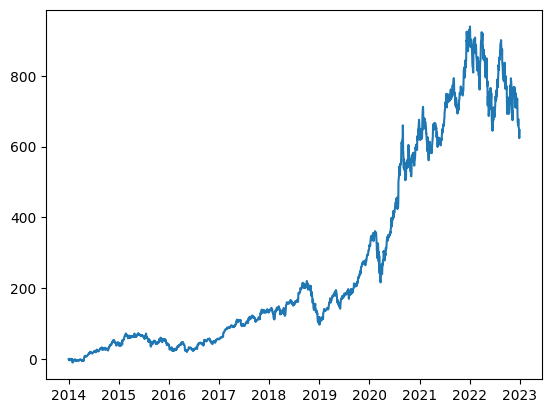

In [28]:
plt.plot(stock_data['Cumulative Return'])

In [29]:
stock_data['20-day SMA'] = stock_data['Adj Close'].rolling(window=20).mean()
# the 20-day SMA provides a straightforward way to smooth out daily price fluctuation, giving traders a better view of the stock;s short-term trend. 
stock_data['20-day EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()
# the 20-day EMA is more sensitive to recent price changes.  

In [31]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily return,Cumulative Return,20-day SMA,20-day EMA
Date,,,,,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.754642,19.893929,19.715000,19.845715,234684800,NaN,0.000000,NaN,17.253258
2014-01-03 00:00:00+00:00,16.874281,19.320715,19.775000,19.301071,19.745001,392467600,-2.196552,-2.196552,NaN,17.217165
2014-01-06 00:00:00+00:00,16.966297,19.426071,19.528570,19.057142,19.194643,412610800,0.545305,-1.663226,NaN,17.193273
2014-01-07 00:00:00+00:00,16.844952,19.287144,19.498571,19.211430,19.440001,317209200,-0.715215,-2.366545,NaN,17.160099
2014-01-08 00:00:00+00:00,16.951628,19.409286,19.484285,19.238930,19.243214,258529600,0.633282,-1.748250,NaN,17.140245


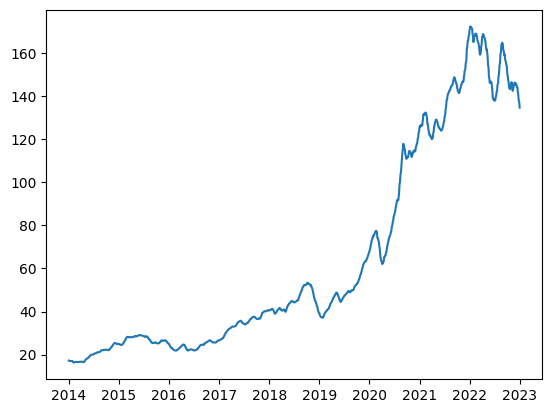

In [32]:
plt.plot(stock_data['20-day EMA'])

In [34]:
stock_data['20-day Volatility'] = stock_data['Daily return'].rolling(window=20).std() * 100

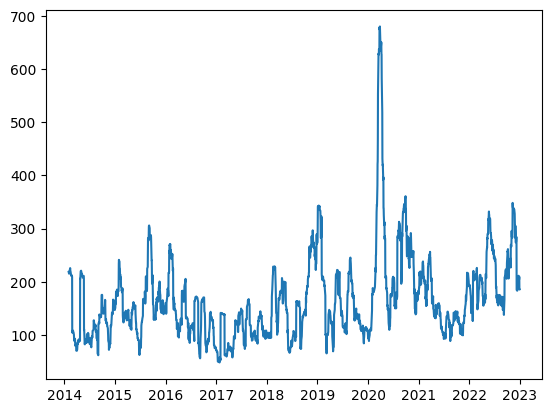

In [35]:
plt.plot(stock_data['20-day Volatility'])
# we should work on this more regarding to the risk especially. 
# The 20-day volatility is a measure of how much a stock’s price fluctuates over a 20-day period, 
# reflecting its risk or stability in the short term. 

In [39]:
# relative strength index (RSI)
# RSI is a momentum oscillator that measures the speed and change of price movements.
# RSI above 70 is often considered overbought, below 30 is considered oversold.
delta = stock_data['Adj Close'].diff(1)
gain = delta.where(delta > 0, 0) # non-positive is replaced by 0.
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))
# but what is overbought and what is oversold.


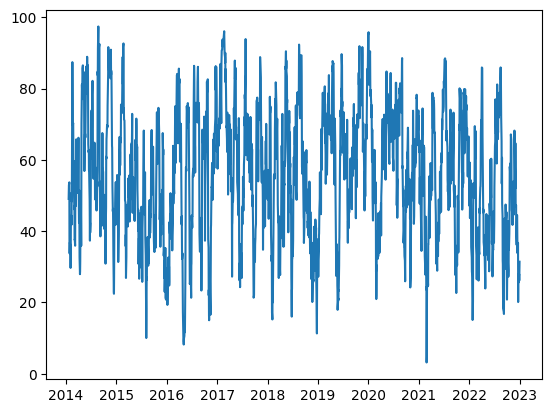

In [40]:
plt.plot(stock_data['RSI'])

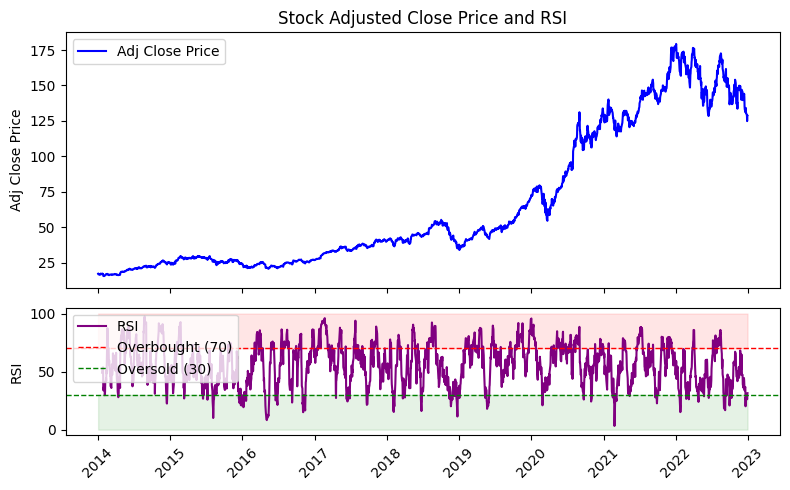

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot Adjusted Close Price on the first subplot
ax1.plot(stock_data.index, stock_data['Adj Close'], color='blue', label='Adj Close Price')
ax1.set_title('Stock Adjusted Close Price and RSI')
ax1.set_ylabel('Adj Close Price')
ax1.legend(loc='upper left')

# Plot RSI on the second subplot
ax2.plot(stock_data.index, stock_data['RSI'], color='purple', label='RSI')
ax2.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
ax2.fill_between(stock_data.index, 70, 100, color='red', alpha=0.1)  # Highlight overbought area
ax2.fill_between(stock_data.index, 0, 30, color='green', alpha=0.1)  # Highlight oversold area
ax2.set_ylabel('RSI')
ax2.legend(loc='upper left')

# Make the layout more readable
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# MACD (Moving Average Convergence Divergence) 
# is a trend-following momentum indicator that shows the relationship between two EMAs, 
# commonly the 12-day and 26-day EMAs. It’s used to identify potential buy and sell signals.
stock_data['12-day EMA'] = stock_data['Adj Close'].ewm(span=12, adjust=False).mean()
stock_data['26-day EMA'] = stock_data['Adj Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD
stock_data['MACD'] = stock_data['12-day EMA'] - stock_data['26-day EMA']

In [42]:
# Bollinger Bands
# Explanation

# Bollinger Bands consist of a middle band (20-day SMA) with an upper and lower band set at two standard deviations from the SMA. 
# It measures volatility: when bands widen, volatility is high; when they narrow, volatility is low.
stock_data['20-day SMA'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate 20-day standard deviation
stock_data['20-day STD'] = stock_data['Adj Close'].rolling(window=20).std()

# Calculate Bollinger Bands
stock_data['Upper Band'] = stock_data['20-day SMA'] + (stock_data['20-day STD'] * 2)
stock_data['Lower Band'] = stock_data['20-day SMA'] - (stock_data['20-day STD'] * 2)

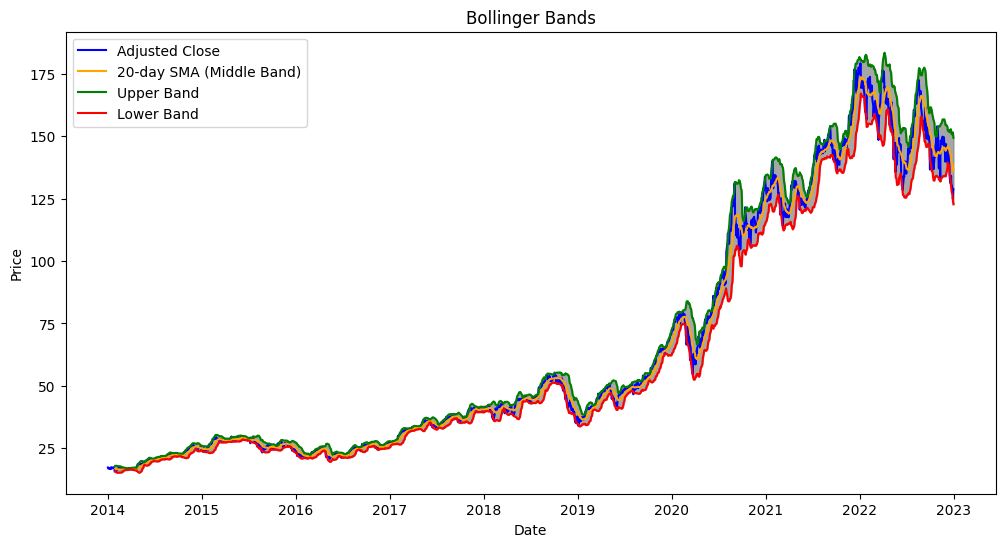

In [50]:
# Plotting Adjusted Close Price along with Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(stock_data['Adj Close'], label='Adjusted Close', color='blue')
plt.plot(stock_data['20-day SMA'], label='20-day SMA (Middle Band)', color='orange')
plt.plot(stock_data['Upper Band'], label='Upper Band', color='green')
plt.plot(stock_data['Lower Band'], label='Lower Band', color='red')

# Fill the area between the Upper and Lower Bands
plt.fill_between(stock_data.index, stock_data['Upper Band'], stock_data['Lower Band'], color='gray', alpha=0.7)

# Add labels and legend
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [44]:
# Sharpe Ratio
# Explanation

# The Sharpe Ratio measures the risk-adjusted return of a stock. 
# A higher Sharpe Ratio means that the return is higher relative to the risk taken.

# Assuming the risk-free rate is 0 for simplicity
mean_return = stock_data['Daily return'].mean()
std_return = stock_data['Daily return'].std()

# Set a risk-free rate (e.g., annualized rate, converted to daily if needed)
risk_free_rate = 0.03 / 252  # Assuming 3% annual risk-free rate, converted to daily

sharpe_ratio = (mean_return - risk_free_rate) / std_return

